Epoch 1/100


c:\Users\yoram\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 38716538880.0000 - val_loss: 37823123456.0000
Epoch 2/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 40132935680.0000 - val_loss: 37636636672.0000
Epoch 3/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 40004612096.0000 - val_loss: 36750843904.0000
Epoch 4/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 36246523904.0000 - val_loss: 34013304832.0000
Epoch 5/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 33165344768.0000 - val_loss: 27961370624.0000
Epoch 6/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 25915324416.0000 - val_loss: 18167220224.0000
Epoch 7/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 16209001472.0000 - val_loss: 7696648704.0000
Epoch 8/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7060769280.0000 - val_loss: 2506617344.0000
Epoch 9/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2860923904.0000 - val_loss: 1722151424.0000
Epoch 10/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2554248192.

<Axes: >

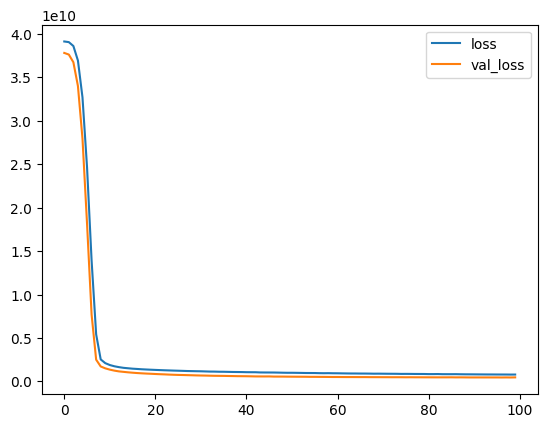

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load the dataset
data = pd.read_csv('train.csv')

# Separate the target variable and features
X = data.drop(columns=['SalePrice', 'Id'])
y = data['SalePrice']

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Define the preprocessing for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit and transform the training data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Define the neural network architecture
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_processed.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train_processed, y_train, epochs=100, validation_split=0.2, batch_size=32)

# Evaluate the model on the test set
test_loss = model.evaluate(X_test_processed, y_test)

print(f'Test loss: {test_loss}')

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()

In [11]:
y_pred = model.predict(X_train_processed)

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [15]:
type(X_train_processed)

scipy.sparse._csr.csr_matrix

In [12]:
type(y_train)

pandas.core.series.Series

In [13]:
y_train

254     145000
1066    178000
638      85000
799     175000
380     127000
         ...  
1095    176432
1130    135000
1294    115000
860     189950
1126    174000
Name: SalePrice, Length: 1168, dtype: int64

In [14]:
y_pred

array([[138248.2 ],
       [182040.08],
       [ 78190.4 ],
       ...,
       [139343.38],
       [167813.88],
       [206437.94]], dtype=float32)